# EXPLORATORY DATA ANALYSIS OF TITANIC PASSENGER SURVIVAL

This analysis examines the factors affecting passenger survival on the Titanic. We explore attributes like age, gender, and family size to identify patterns. Key findings show that women and older passengers had higher survival rates compared to younger men. We also look at the impact of traveling alone versus with family. Visualizations and summaries provide a clear understanding of the main factors influencing survival.

## 1. Import & load dataset
At first, we need to import the required libraries & load the Titanic dataset.

In [22]:
#Import the necessary liberaries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the dataset from csv file.

df=pd.read_csv('titanic_dataset.csv')

In [24]:
# Display the 1st few records od dataset.

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#Check the size of dataset.

df.shape

(891, 12)

In [26]:
# Check the datatype of each column.

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. Check the missing values
In this step we need to check the missing values in the dataset & handle them accordingly.

In [27]:
# check the % of missing values in the particular columns.

100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [28]:
#Here, we can see that cabin column have very high percentage of missing values.so, simply we can drop it.

df=df.drop('Cabin',axis=1)

In [29]:
# Drop the rows of with missing Embarked values.

df.dropna(subset=['Embarked'],inplace=True)

In [37]:
# Now fill the Age column missing value with its mean value.

mean_age=df['Age'].mean().round()
df['Age'].fillna(mean_age,inplace=True)

In [166]:
#Check the missing value again.

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family         0
TravelAlone    0
dtype: int64

- Now we can see that there are no missing values in any of the columns.

## 3. Summary Statistics
Analyze some basic statistical parameter in the numerical columns.

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.713352,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.969135,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Majority of the passengers were younger, with an average age of approx 29.64 year.
- Most passengers traveled in 3rd class.
- Around 38% of total passengers survived.

# 4. Data Visualization
Here, we will create various visualizations to explore relationship between variables. 

Text(0.5, 1.0, 'AGE DISTRIBUTION')

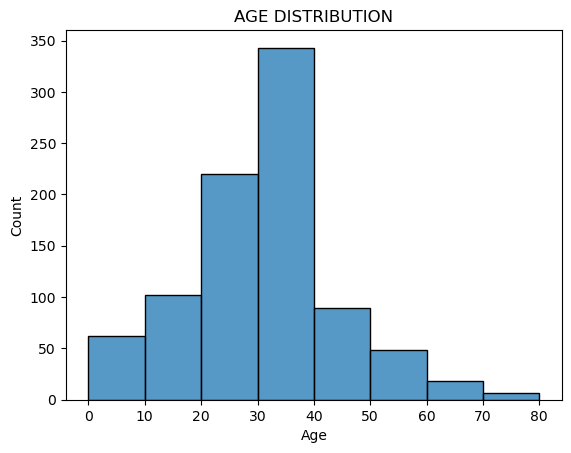

In [74]:
# Analyze the Age distribution with the help of histogram plot.

sns.histplot(data=df,x='Age',bins=[0,10,20,30,40,50,60,70,80])
plt.title('AGE DISTRIBUTION')

- Most passengers were in the age group of 30 to 40 years.

Text(0.5, 1.0, 'GENDER WISE COUNT')

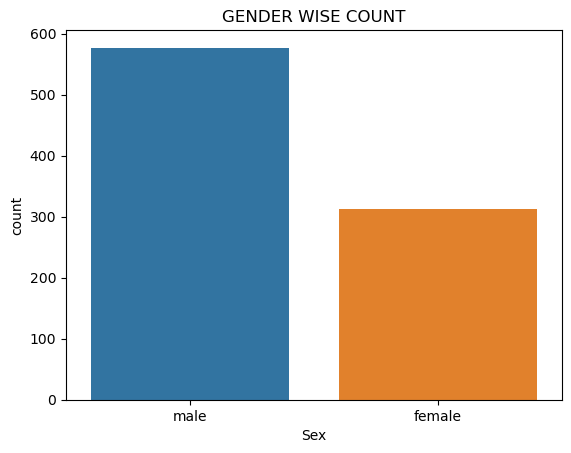

In [73]:
# Analyze the male & female count with the help of countplot.

sns.countplot(df,x='Sex')
plt.title('GENDER WISE COUNT')

- Male passengers was almost double as compare to female.

<Axes: ylabel='Fare'>

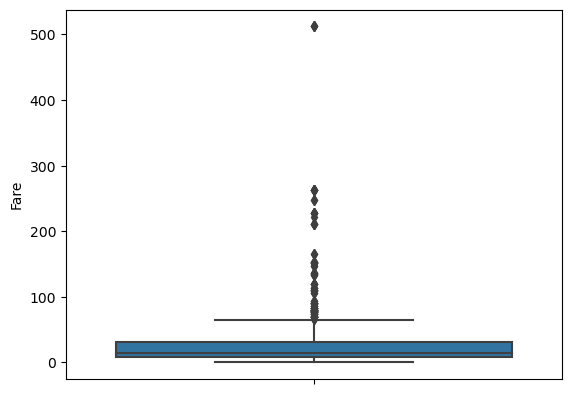

In [72]:
# Analyze the fare column with the help of boxplot.

sns.boxplot(df,y='Fare')

- Most of the passengers traveled at a lower cost ticket, as the majority of them were in the 3rd class.

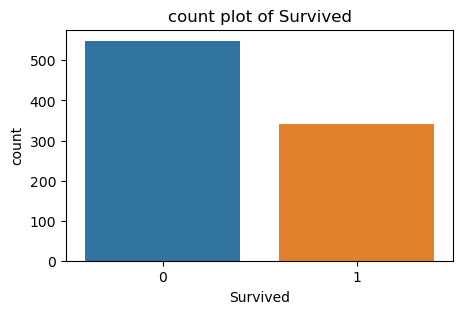

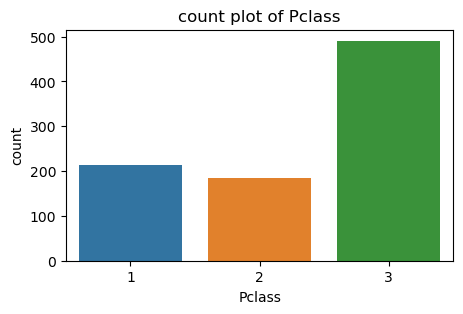

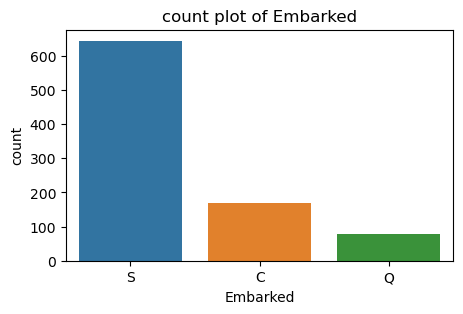

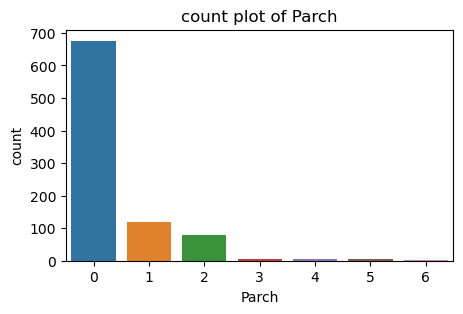

In [88]:
# Analyze all the remaining categorical columns with the help of count plot.

cat_col=['Survived','Pclass','Embarked','Parch']
for col in cat_col:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df,x=col)
    plt.title(f'count plot of {col}')
    plt.show()

- Most of the passengers did not survived.
- The majority of the passengers were traveled in the 3rd class.
- There are 3 embarkation points, & most of the passengers embarked from the 'S' point.
- Most of the passengers were travelling alone.

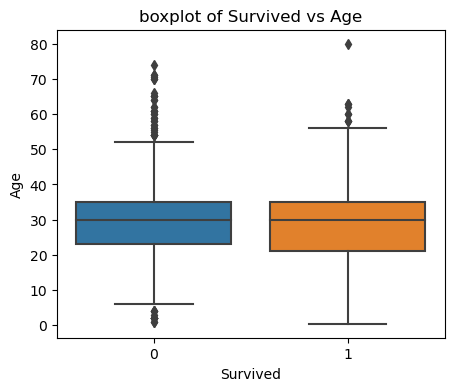

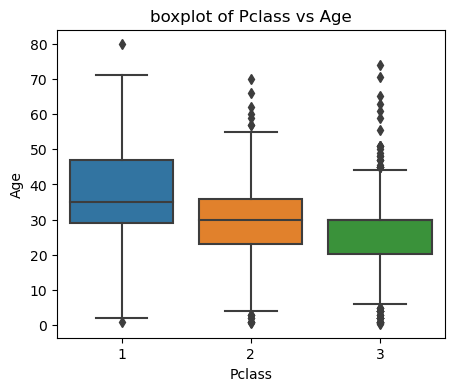

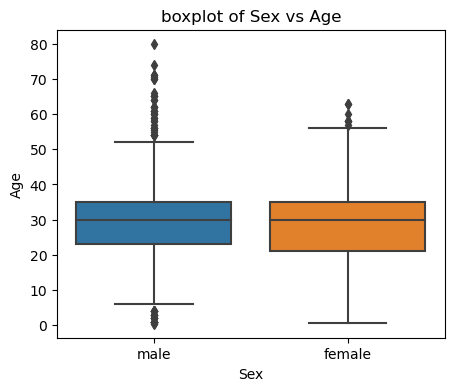

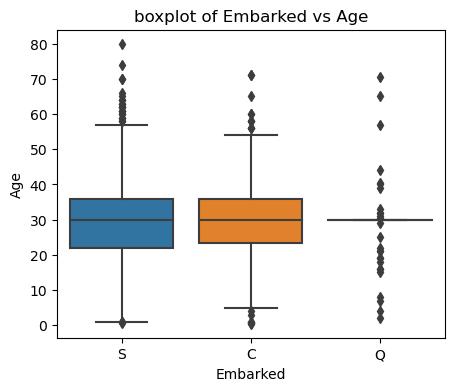

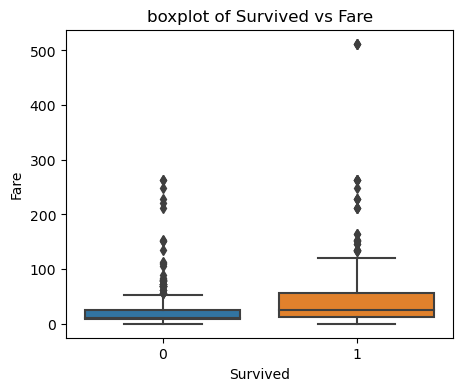

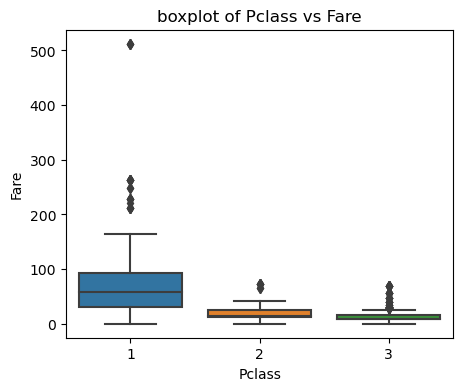

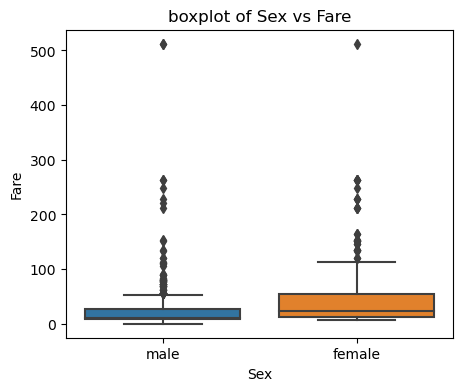

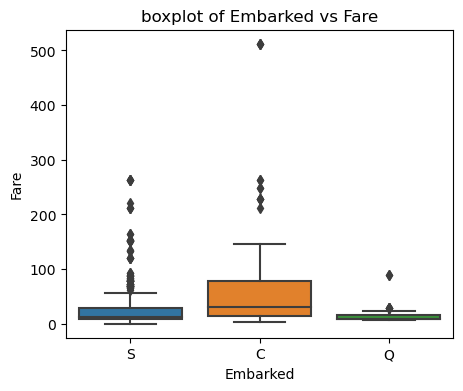

In [184]:
#Analyze numerical with categorical columns with the help of boxplot.

num_col=['Age','Fare']
cat_col=['Survived','Pclass','Sex','Embarked']
for col1 in num_col:
    for col2 in cat_col:
        plt.figure(figsize=(5,4))
        sns.boxplot(df,x=col2,y=col1)
        plt.title(f'boxplot of {col2} vs {col1}')
        plt.show()

- The fare for the 1st class was significantly more expensive compared to the 2nd and 3rd classes.
- Most of the older passengers and female passengers traveled in the 1st class.
- Most of the passengers embarked from the 'S' point.

C:\Users\computer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


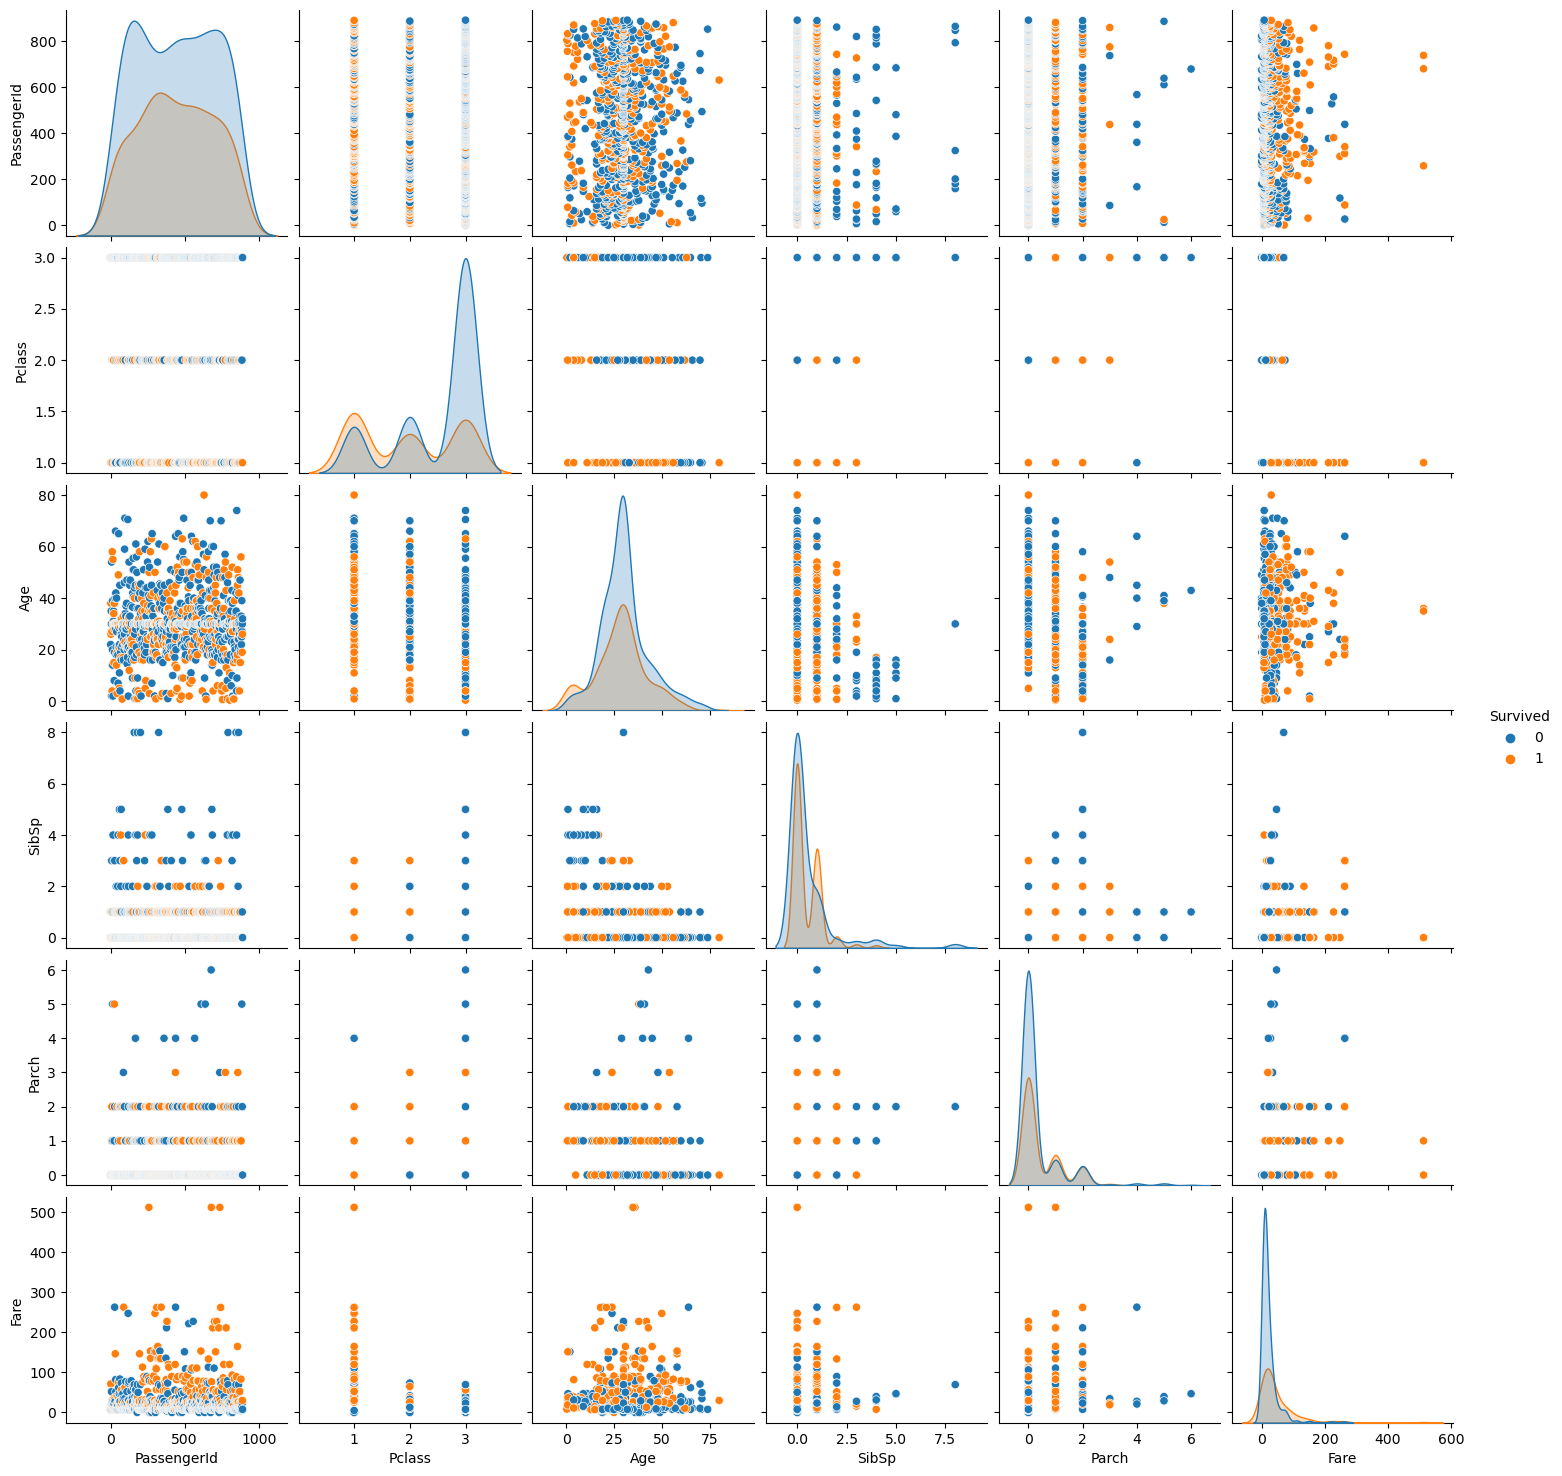

In [115]:
# Make the pairplot to analyze all the numerical columns.

sns.pairplot(df,hue='Survived')

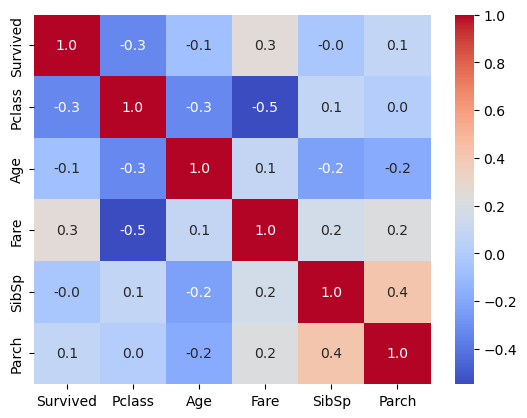

In [181]:
# Create a heatmap to visualize the correlations between numerical columns.

df_num=df[['Survived','Pclass','Age','Fare','SibSp','Parch']]
sns.heatmap(df_num.corr(),annot=True,cmap='coolwarm',fmt='0.1f')
plt.show()

# 5. Feature Engineering
Creating a new feature to represent whether a passenger is travelling alone or with family.

In [147]:
df['Family']=df['SibSp']+df['Parch']
df['TravelAlone'] = np.where(df['Family'] == 0, 1, 0)

In [174]:
# Analyze rate of survival who trival alone

sur_df=df.groupby(['Survived','TravelAlone'])['PassengerId'].count().unstack()

In [179]:
sur_df

TravelAlone,0,1
Survived,,
0,175,374
1,179,161


<Axes: xlabel='Survived'>

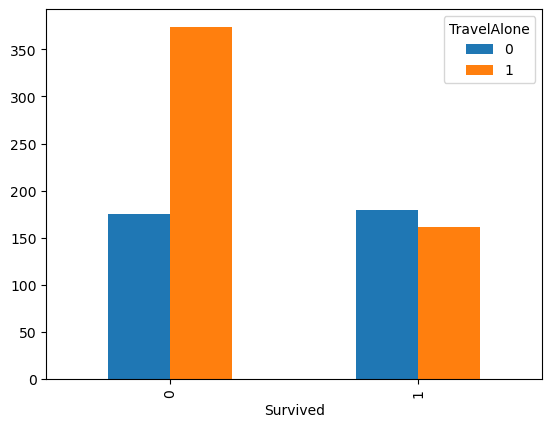

In [180]:
sur_df.plot.bar()

- From this analysis, we can see that passengers who were traveling with family had a higher survival rate compared to those who were traveling alone.

# 6. Conclusion

Based on the EDA, we gained insights into the relationships between various variables and the survival rate of passengers.

- Around 38% of total passengers survived.
- Most passengers were in the age group of 30 to 40 years.
- Most of the passengers traveled at a lower cost ticket, as the majority of them were in the 3rd class.
- There are 3 embarkation points, & most of the passengers embarked from the 'S' point.
- The passengers who were traveling with family had a higher survival rate compared to those who were traveling alone.
- Also the rate of survival for women and older people is higher compared to younger men.
- Travelling in Pclass 3 was deadliest.